In [27]:
#로지스틱 회귀(if 0.5이상이면 합격, 미만이면 불합격)
import pandas as pd # 데이터 분석을 위한 리이브러리
import matplotlib.pyplot as plt #시그모이드 함수 시각화 목적 라이브러리

In [28]:
dataset=pd.read_csv("data/LogisticRegressionData.csv")
# dataset.head() dataset이 잘 불러오기 되었는지 확인

In [29]:
# X, y 독립 종속변수 지정
X=dataset.iloc[:,-1:].values #1차항변 데이터는 2차항변으로 변환시켜줘야 함
y=dataset.loc[:,'pass'].values #1차는 소문자 변수//2차는 대문자 변수 지정(약속), loc는 좌표입력X, Columns명으로 가지고 오므로 넘길 경우 'pass'로 넘기기 가능

In [30]:
# 과적합 방지를 하기 위해 train/test 데이터를 나눠주는 라이브러리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0) #train을 0.8, test를 0.2
#X_test.shape, X_train.shape

In [31]:
#로지스틱 모델 만들기 라이브러리(일정점수 이상 시 T/F추출)
from sklearn.linear_model import LogisticRegression
logistic=LogisticRegression()
logistic.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
#만들어진 로지스틱 모형에 시간 투입해보기
logistic.predict([[6]]) #6시간 공부했을 떄 합격(1) or 불합격(0)
logistic.predict([[6],[3]]) #6시간, 3시간 공부했을때 합격(1) or 불합격(0)

#확률 계산하기(6시간 공부 시 합격 확률 예측하기)
logistic.predict_proba([[4.6]])

array([[1.71835120e-04, 9.99828165e-01]])

In [33]:
#y테스트 데이터를 가지고 예측
y_pred=logistic.predict(X_test) # X_test(실 합불) 기준으로 예측

In [34]:
# 모델이 잘 예측하는지 점수 내기
logistic.score(X_test, y_test) #0~1사이 값 추출

1.0

In [35]:
#로지스틱 학습 함수 만들기(로지스틱 데이터 파일에서 X,y값을 정해주고 훈련.테스트 데이터를 나눠주고 로지스틱 훈련 모델 생성 후 return 해줌)
def model_logistic():
    import pandas as pd
    dataset=pd.read_csv('data/LogisticRegressionData.csv')
    X=dataset.iloc[:,-1:].values
    y=dataset.iloc[:,-1].values # ok=iloc[:,-1]

    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=0)

    from sklearn.linear_model import LogisticRegression
    logistic=LogisticRegression()
    logistic.fit(X_train,y_train)
    return logistic

In [36]:
#만든 함수 바탕으로 예측하기
model=model_logistic()
hour=3.5
model.predict([[hour]])
model.predict_proba([[hour]])

array([[0.00167756, 0.99832244]])

In [37]:
#로지스틱모델을 기반으로 예측하고 결과를 출력해주는 함수(로지스틱 모델을 전제)
def predict(hour):
    model=model_logistic()
    pred=model.predict([[hour]]) #예측값
    pred_proba=model.predict_proba([[hour]]) #예측값에 대한 확률
    pass_proba=pred_proba[0][1] #실패확/성공확 순서로 기입이므로 0,1이 성공확률
    fail_proba=pred_proba[0][0]
    if pred[0]==0: 
        result='불합격'
    else:
        result='합격'
    print(f'{hour}시간 공부한 경우 {result}입니다!')
    print(f'합격 확률:{pass_proba*100:.2f}% | 불합격 확률:{fail_proba*100:.2f}%')

predict(5)

5시간 공부한 경우 합격입니다!
합격 확률:99.99% | 불합격 확률:0.01%


In [38]:
import numpy as np
max=np.ceil(np.max(X_train)) #floor 버림 // ceil 올림
min=np.floor(np.min(X_train))
x_range=np.arange(min,max,0.2)
x_range
#p=1/1(e+e^-y) y=mx+b
y=logistic.coef_ * x_range+logistic.intercept_
P=1/(1+np.exp(-y))
P.shape
cols=P.shape[1]
p=P.reshape(cols)
p

array([0.29608055, 0.38901029, 0.49077199, 0.59330422, 0.6883035 ])

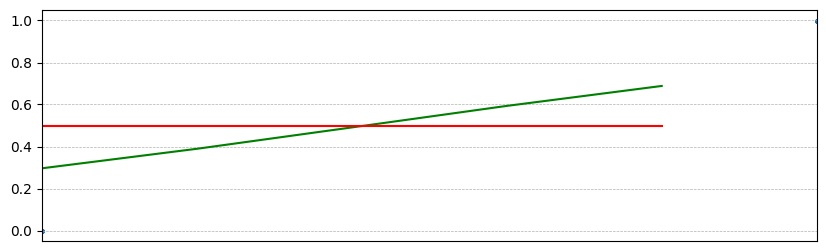

In [39]:
#로지스틱 모델의 시각화 작업하기(train data)
plt.figure(figsize=(10,3))
plt.scatter(X_train, y_train,s=5)
plt.plot(x_range,p,c='green')

plt.grid(True,ls='--',lw=0.5)
plt.plot(x_range,np.full(len(x_range),0.5),color='r')
xticks=[int(x) for x in x_range+2]
plt.xticks(xticks,[f'{x}h' for x in xticks])
plt.xlim(0,max)
plt.show()

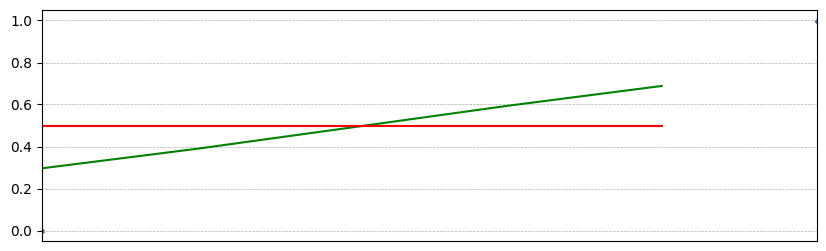

In [40]:
#로지스틱 모델의 시각화 작업하기(test data)
plt.figure(figsize=(10,3))
plt.scatter(X_test, y_test,s=5)
plt.plot(x_range,p,c='green')

plt.grid(True,ls='--',lw=0.5)
plt.plot(x_range,np.full(len(x_range),0.5),color='r')
xticks=[int(x) for x in x_range+2]
plt.xticks(xticks,[f'{x}h' for x in xticks])
plt.xlim(0,max)
plt.show()